# EMIP Toolkit Examples:

In this file we will show examples of the main functionalities included in the EMIP Toolkit.

This includes:  
•	Reading Raw Data Files from EMIP Dataset into Toolkit Containers.  
•	Applying a Fixation Filter to Raw Data.  
•	Raw Data and Filtered Fixation Visualization.  
•	Apply Fixation Correction Through Offset.  
•	Undo Applied Offset.  
•	Generate AOIs for any EMIP Trial.  
•	Draw AOIs over Trial Image.  
•	Add Text Tokens to Generated AOIs.  
•	Add srcML Tags to AOIs and Tokens.  
•	Hit Test Between Fixations and AOIs.
 

In [1]:
import emip_toolkit as tk

# Reading Raw Data Files from EMIP Dataset:  

1. Download the EMIP dataset and data collection matrial from: http://emipws.org/emip_dataset/  
2. Unzip the dataset and data collection matrial in the parent directry to the directory where this tutorial is.  
3. The folder structure should look like the following:  
  
-parent_dir
    + emip_dataset  
            + rawdata
            + EMIP_DataCollection_Materials
    + current_directory  
            + EMIP_Toolkit_Examples


In [3]:
EMIP = tk.EMIP_dataset("datasets/EMIP/EMIP-Toolkit- replication package/emip_dataset/rawdata/", 216)   # gets the structured data of 10 subjects

print('number of subjects: ', len(EMIP))
print('subject ID: ', EMIP['177'].trial[0].get_subject_id())
print('number of trials: ', EMIP['177'].get_number_of_trials())
print('number of samples in trial: ',EMIP['177'].trial[0].get_sample_number())

100_rawdata.tsv
parsing file: datasets/EMIP/EMIP-Toolkit- replication package/emip_dataset/rawdata/100_rawdata.tsv
101_rawdata.tsv
parsing file: datasets/EMIP/EMIP-Toolkit- replication package/emip_dataset/rawdata/101_rawdata.tsv
102_rawdata.tsv
parsing file: datasets/EMIP/EMIP-Toolkit- replication package/emip_dataset/rawdata/102_rawdata.tsv
103_rawdata.tsv
parsing file: datasets/EMIP/EMIP-Toolkit- replication package/emip_dataset/rawdata/103_rawdata.tsv
104_rawdata.tsv
parsing file: datasets/EMIP/EMIP-Toolkit- replication package/emip_dataset/rawdata/104_rawdata.tsv
105_rawdata.tsv
parsing file: datasets/EMIP/EMIP-Toolkit- replication package/emip_dataset/rawdata/105_rawdata.tsv
106_rawdata.tsv
parsing file: datasets/EMIP/EMIP-Toolkit- replication package/emip_dataset/rawdata/106_rawdata.tsv
107_rawdata.tsv
parsing file: datasets/EMIP/EMIP-Toolkit- replication package/emip_dataset/rawdata/107_rawdata.tsv
108_rawdata.tsv
parsing file: datasets/EMIP/EMIP-Toolkit- replication package/em

# Applying a Fixation Filter to Raw Data:

EMIP Toolkit implements a dispersion-based fixation detection algorithm (I-DT). The technique uses a duration window over the gaze data with a length equal to the minimum fixation duration threshold. In addition to this time window, samples are added until sample spacial dispersion exceeds the maximum dispersion threshold. 

The fixation filter parameters have default values of:  
* minimum_duration 50 milliseconds  
* sample_duration 4 milliseconds  
* maxmimum_dispersion 25 pixels  

In [7]:
# select any subject and trial number.
subject_ID = '6'
trial_num = 2      # valid source code trials are 2 and 5

# apply fixation filter to specific trial
# EMIP[subject_ID].trial[trial_num].filter_fixations(minimum_duration=50, sample_duration=4, maxmimum_dispersion=25)

# you can use the method get_fixation_number() to count the fixations after filtering in a trial
print("number of fixations: ", EMIP[subject_ID].trial[trial_num].get_fixation_number())

number of fixations:  241


In [11]:
# accessor for samples count
print("raw sample count:", EMIP[subject_ID].trial[trial_num].get_sample_number())

# accessor for trial image
print("trial image:", EMIP[subject_ID].trial[trial_num].get_trial_image())

raw sample count: 9952
trial image: rectangle_java.jpg


# Raw Data and Filtered Fixation visualization:  

You can visualize any trial raw data, filtered fixations, or a combination of the two.  Filtered fixations are in green, and raw samples are in red.

Try changing the code to: 

```
draw_trial(image_path, False, True)
```
or
```
draw_trial(image_path, True, False)
```

In [12]:
image_path = "../../emip_dataset/stimuli/"

EMIP[subject_ID].trial[trial_num].draw_trial(image_path, draw_raw_data=True, draw_fixation=True)

FileNotFoundError: [Errno 2] No such file or directory: '../../emip_dataset/stimuli/rectangle_java.jpg'

# Apply fixation correction through offset:

You can apply fixation corection using sample_offset(x_offset, y_offset) on the Trial object.

Try running this with:

```
sample_offset(-200, 100)
```
You can then visualize the trial to see the effect:
```
draw_trial(image_path, True, True)
```

In [13]:
# apply offset
EMIP[subject_ID].trial[trial_num].sample_offset(-200, 100) # x:100 and y:50 just for example

# draw trial again
EMIP[subject_ID].trial[trial_num].draw_trial(image_path, True, True)

FileNotFoundError: [Errno 2] No such file or directory: '../../emip_dataset/stimuli/rectangle_java.jpg'

You can get the total applied offset, useful after a few calls to sample_offset method.

Try running this with:
```
get_offset()
```

In [15]:
print("Current offset:", EMIP[subject_ID].trial[trial_num].get_offset())

Current offset: (-200, 100)


After applying offset to samples you can call fixation filter again to generate fixations from samples at thier new position.

# Undo applied offset:

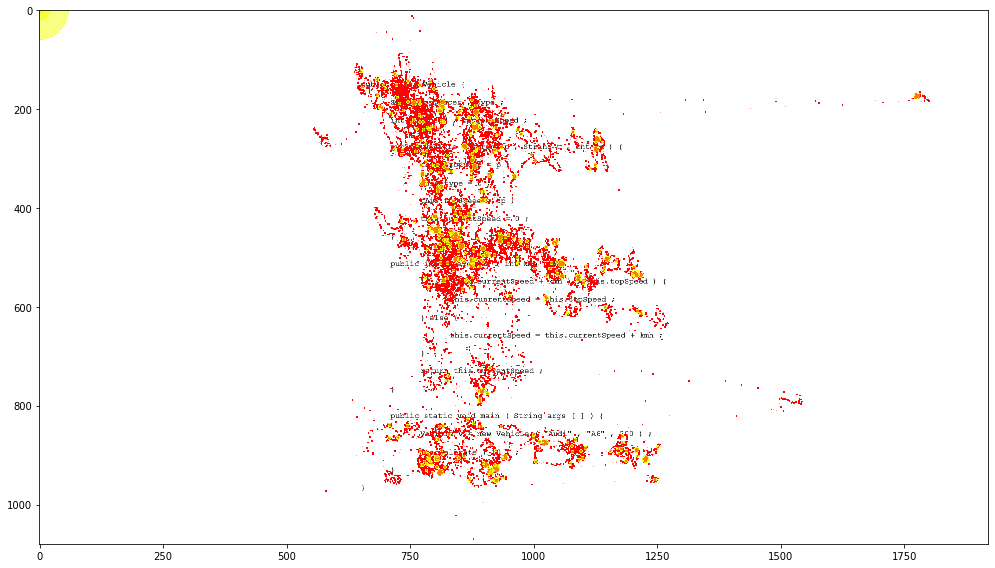

In [10]:
# undo all previous offset
EMIP[subject_ID].trial[trial_num].reset_offset()

# draw trial again
EMIP[subject_ID].trial[trial_num].draw_trial(image_path, draw_raw_data=True, draw_fixation=True)

# Generate AOIs for any EMIP Trial:  

You can generate token level or line level AOIs for any trial code file in the EMIP dataset.

Try running this with:
```
image_path = "emip_dataset/stimuli/"
image = "rectangle_java2.jpg"

aoi = tk.find_aoi(image, image_path, "sub-line")
```

In [12]:
image_path = "./datasets/EMIP/EMIP-Toolkit- replication package/emip_dataset/stimuli/"
image = "rectangle_java2.jpg"
aoi = tk.find_aoi(image, image_path, level="sub-line")
aoi.head()

,kind,name,x,y,width,height,image
0,sub-line,line 1 part 1,589.5,222,63,21,rectangle_java2.jpg
1,sub-line,line 1 part 2,657.5,222,52,21,rectangle_java2.jpg
2,sub-line,line 1 part 3,715.5,222,90,21,rectangle_java2.jpg
3,sub-line,line 1 part 4,813.5,222,10,21,rectangle_java2.jpg
4,sub-line,line 2 part 1,669.5,259,72,21,rectangle_java2.jpg


# Draw AOIs over trial image:


You can draw the obtained AOIs for the trial code file on the trial image in the EMIP dataset.

Try running this with: <br>
```
image_path = "emip_dataset/stimuli/"
image = "rectangle_java2.jpg"

tk.draw_aoi(aoi, image, image_path)
```

In [11]:
image = "rectangle_java.jpg"

tk.draw_aoi(aoi, image, image_path)

NameError: name 'aoi' is not defined

# Add text tokens to generated AOIs:

In [14]:
aoi.head()

,kind,name,x,y,width,height,image
0,sub-line,line 1 part 1,589.5,222,63,21,rectangle_java2.jpg
1,sub-line,line 1 part 2,657.5,222,52,21,rectangle_java2.jpg
2,sub-line,line 1 part 3,715.5,222,90,21,rectangle_java2.jpg
3,sub-line,line 1 part 4,813.5,222,10,21,rectangle_java2.jpg
4,sub-line,line 2 part 1,669.5,259,72,21,rectangle_java2.jpg


In [16]:
file_path = "./datasets/EMIP/EMIP-Toolkit- replication package/emip_dataset/EMIP_DataCollection_Materials/emip_stimulus_programs/"

aois_with_tokens = tk.add_tokens_to_AOIs(file_path, aoi)

aois_with_tokens

,kind,name,x,y,width,height,image,token
0,sub-line,line 1 part 1,589.5,222,63,21,rectangle_java2.jpg,public
1,sub-line,line 1 part 2,657.5,222,52,21,rectangle_java2.jpg,class
2,sub-line,line 1 part 3,715.5,222,90,21,rectangle_java2.jpg,Rectangle
3,sub-line,line 1 part 4,813.5,222,10,21,rectangle_java2.jpg,{
4,sub-line,line 2 part 1,669.5,259,72,21,rectangle_java2.jpg,private
...,...,...,...,...,...,...,...,...
139,sub-line,line 16 part 5,1057.5,766,10,21,rectangle_java2.jpg,)
140,sub-line,line 16 part 6,1077.5,766,9,21,rectangle_java2.jpg,)
141,sub-line,line 16 part 7,1096.5,766,10,21,rectangle_java2.jpg,;
142,sub-line,line 17 part 1,672.5,804,10,18,rectangle_java2.jpg,}


# Add srcML tags to AOIs and tokens:  

The srcML format is an XML representation for source code, where the markup tags identify elements of the abstract syntax for the language. Read more about it: https://www.srcml.org/about.html

In [17]:
srcML_path = "./datasets/EMIP2021/"

aois_tokens_srcml = tk.add_srcml_to_AOIs(aois_with_tokens, srcML_path)

aois_tokens_srcml

,kind,name,x,y,width,height,image,token,srcML_tag
0,sub-line,line 1 part 1,589.5,222,63,21,rectangle_java2.jpg,public,class->specifier
1,sub-line,line 1 part 2,657.5,222,52,21,rectangle_java2.jpg,class,class
2,sub-line,line 1 part 3,715.5,222,90,21,rectangle_java2.jpg,Rectangle,class->name
3,sub-line,line 1 part 4,813.5,222,10,21,rectangle_java2.jpg,{,class->block
4,sub-line,line 2 part 1,669.5,259,72,21,rectangle_java2.jpg,private,class->block->decl_stmt->decl->type->specifier
...,...,...,...,...,...,...,...,...,...
139,sub-line,line 16 part 5,1057.5,766,10,21,rectangle_java2.jpg,),class->block->function->block->block_content->...
140,sub-line,line 16 part 6,1077.5,766,9,21,rectangle_java2.jpg,),class->block->function->block->block_content->...
141,sub-line,line 16 part 7,1096.5,766,10,21,rectangle_java2.jpg,;,class->block->function->block->block_content->...
142,sub-line,line 17 part 1,672.5,804,10,18,rectangle_java2.jpg,},class->block->function->block


# Hit Test between Fixations and AOIs:  

Match fixations to AOIs to calculate the fixation duration over each AOI (can be customized for line or code token).  
radius is 25 pixels by default and it represents the area around the AOI included in the AOI region.

In [38]:
aoi_fixes = tk.hit_test(EMIP[subject_ID].trial[trial_num], aois_tokens_srcml, radius=25)
print(aoi_fixes['x_cord'])
aoi_fixes.head()

all fixations: 241
0    677.545000
1    744.075333
2    738.480714
3    692.846296
4    715.906429
Name: x_cord, dtype: float64


,trial,participant,code_file,code_language,timestamp,duration,x_cord,y_cord,aoi_x,aoi_y,aoi_width,aoi_height,token,length,srcML
0,2,6,rectangle_java2.jpg,rectangle_java2.jpg,2768972532,96,677.545000,217.174583,657.5,222,52,21,class,5,class
1,2,6,rectangle_java2.jpg,rectangle_java2.jpg,2770019801,60,744.075333,216.612667,715.5,222,90,21,Rectangle,9,class->name
2,2,6,rectangle_java2.jpg,rectangle_java2.jpg,2770079983,56,738.480714,210.189286,715.5,222,90,21,Rectangle,9,class->name
3,2,6,rectangle_java2.jpg,rectangle_java2.jpg,2771856186,108,692.846296,254.221111,669.5,259,72,21,private,7,class->block->decl_stmt->decl->type->specifier
4,2,6,rectangle_java2.jpg,rectangle_java2.jpg,2773208079,56,715.906429,299.930000,669.5,295,63,21,public,6,class->block->constructor->specifier
